In [1]:
# Weeeellll, we are going to work here with a very interesting and serious statistics
# on immmigration currents into Canada (within a period 1980 - 2013(-4))
#
# The very source of data on various migrations for further studies could be found by the following 
# link - https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp
#
# Our concrete case data source will be cited and fixed within our particular project. 
# 
# So, Let's start :).


In [2]:
# Initially we need to import basic packages to manipulate with our data afterwards

import numpy as np   
import pandas as pd 


In [3]:
# We are to create a dataframe with the data we need to visualize

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Operation confirmed. Data read into a pandas dataframe!')



Operation confirmed. Data read into a pandas dataframe!


In [4]:
# If you'd like to see what is that in basic terms, try the following:

df_can.head(10)

# df_can.tail(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


In [5]:
# You could also apply a lot of methods to acquire general perception of that:
#
# df_can.info()
# 
# df_can.shape()
#
#



In [6]:
# Since the default type of index and columns is NOT list we need to transform them correctly for a comfortable manipulation.
#
df_can.columns.tolist()

df_can.index.tolist()
#
# After that we are to clean our dataset to remove a few absolutely unnecessary columns.
# We can use pandas drop() method as follows (to your knowledge - axis=1 represents columns in pandas):
#
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# Checking results

df_can.head(10)




,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,268,295,184,106,76,62,61,39,70,45
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,...,14,24,32,15,32,38,27,37,51,25
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,...,1591,1153,847,620,540,467,459,278,263,282
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,147,224,218,198,205,267,252,236,258,207
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,...,930,909,875,1033,1018,1018,933,851,982,1121


In [7]:
# Let's rename our columns to avoid ambiguities so that they make sense. 
# We can use rename() method in pandas by passing in a dictionary of old and new names as follows:

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# Checking correctness of our results 

df_can.columns





Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [8]:
# We will also add a 'Total' column that sums up the total immigrants by country
# over the entire period 1980 - 2013, as follows:

df_can['Total'] = df_can.sum(axis=1)

df_can.head(10)





,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
5,Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,...,295,184,106,76,62,61,39,70,45,2113
6,Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,...,24,32,15,32,38,27,37,51,25,981
7,Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,...,1153,847,620,540,467,459,278,263,282,19596
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
9,Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,...,909,875,1033,1018,1018,933,851,982,1121,23829


In [9]:
# We can check to see how many null objects we have in the dataset as follows:

df_can.isnull().sum()



Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [10]:
# And finally, let's view a quick summary of each column in our dataframe
# using a very interesting  describe() method.

df_can.describe()





,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [11]:
# Now we are to set our index to country name to sort the data correctly.

df_can.set_index('Country', inplace=True)

# Checking the correctness

df_can.head(10)




,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [12]:
# Optionally we can remove the name of the index:

df_can.index.name = None

df_can.head(2)







,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [13]:
# Since our column names that are integers (such as the years) might introduce some confusion in course of our research, we are to work with that.
# For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

# To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

df_can.columns = list(map(str, df_can.columns))

# Let's check the result of this metomorphosis.

[print (type(x)) for x in df_can.columns.values]



<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [14]:
# useful for plotting later on

years = list(map(str, range(1980, 2014)))

In [15]:
# Ok, finally we are ready to start visualizing :)
#
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# Checking if Matplotlib is loaded correctly.

print ('Matplotlib version: ', mpl.__version__)


Matplotlib version:  3.1.3


In [16]:
# We could optionally apply a style to Matplotlib if we wish :).

print(plt.style.available)

mpl.style.use(['ggplot'])






['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


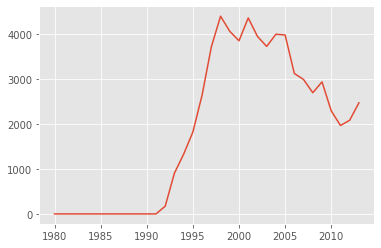

In [18]:
# Let's draw our first very simple line graph :).

russia = df_can.loc['Russian Federation', years] # passing in years 1980 - 2013 to exclude the 'total' column

russia.plot()



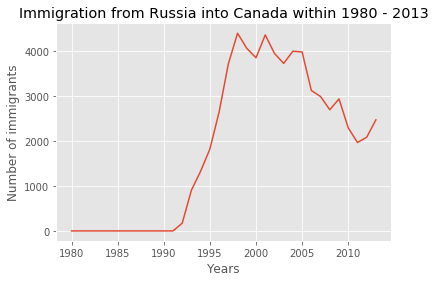

In [19]:
# Yeeeehhhh, not bad, BUT let's make it viable and clear :).

russia.index = russia.index.map(int) # let's change the index values of Russia to type integer for correct plotting
russia.plot(kind='line')

plt.title('Immigration from Russia into Canada within 1980 - 2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure







                   Continent          Region             DevName  1980  1981  \
Russian Federation    Europe  Eastern Europe   Developed regions     0     0   
China                   Asia    Eastern Asia  Developing regions  5123  6682   
India                   Asia   Southern Asia  Developing regions  8880  8670   

                    1982  1983  1984  1985  1986  ...   2005   2006   2007  \
Russian Federation     0     0     0     0     0  ...   3972   3117   2983   
China               3308  1863  1527  1816  1960  ...  42584  33518  27642   
India               8147  7338  5704  4211  7150  ...  36210  33848  28742   

                     2008   2009   2010   2011   2012   2013   Total  
Russian Federation   2690   2931   2288   1963   2079   2466   63344  
China               30037  29622  30391  28502  33024  34129  659962  
India               28261  29456  34235  27509  30933  33087  691904  

[3 rows x 38 columns]


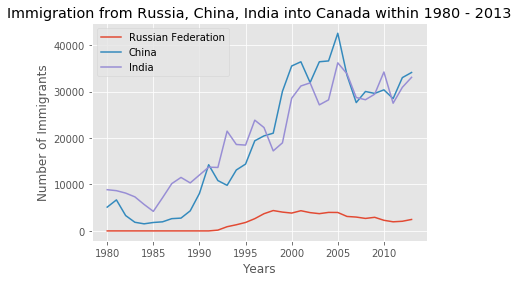

In [20]:
# Let's compare the number of immigrants from Russia, China and India from 1980 to 2013 with help of line graphs.

# BUT be attentive in transposing data for correct visualization :).


print(df_can.loc[['Russian Federation', 'China', 'India']])

df_RCI = df_can.loc[['Russian Federation', 'China', 'India'], years]

df_RCI = df_RCI.transpose()

df_RCI.plot(kind='line')

plt.title('Immigration from Russia, China, India into Canada within 1980 - 2013')

plt.ylabel('Number of Immigrants')

plt.xlabel('Years')

plt.show()


In [21]:
# What main conclusions could we make from this graph lines?
#
# First, New immigrants from China and India are times higher in Canada than those from the RF.
# Secondly, the dynamics of China and India seem to be similar following the same trend.
# Thirdly, the data shows a relative weakness of the Russian community in Canada since our compatriots there are not ready to support each other.
# And, unfortunately, the Russians are very weak to satisfy requirements for immigration - especially after their toughening in terms of the English language and higher education degrees. 

      India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      
1985   4211   1816                                               9564      
1986   7150   1960                                               9470      
1987  10189   2643                                              21337      
1988  11522   2758                                              27359      
1989  10343   4323                                              23795      
1990  12041   8076                                              31668      
1991  13734  14255                                              23380      
1992  13673 

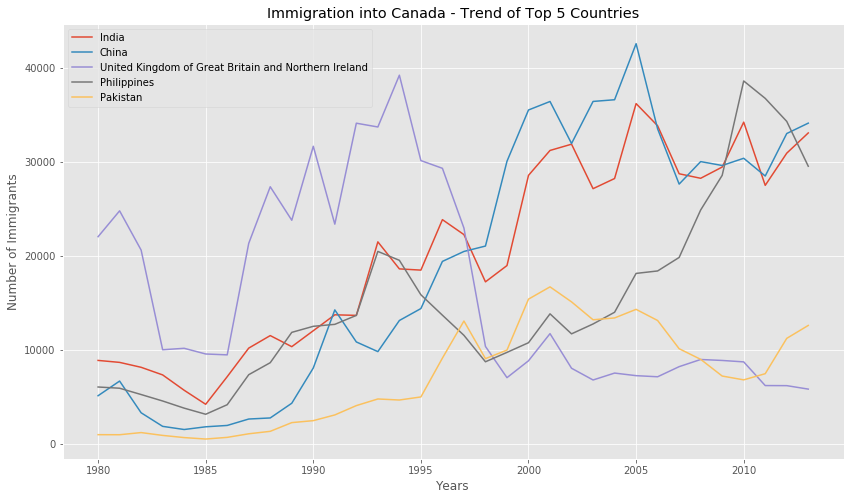

In [22]:
# To finish in an interesting manner our games with lines let's compare 5 top countries in terms of immigration to Canada :).

df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
print(df_top5)

df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for correct plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size for better viewing


plt.title('Immigration into Canada - Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()







In [23]:
#  Well, factually I do not have any prejudices against any nation in this world but I am rather
# disappointed to see that the most immigrants into Canada arrive from a less developed world...
#
# And, besides, as a person who lived and worked in Canada :) I could confirm that this data also reveals a very interesting
# but a pity fact - in Canada the very society is rather ready to assimilate those who are to serve them and not to compete with them on the labour market.
# That's why they prefer rather "servants" and not professionals to arrive there :(. 
#
#







In [24]:
#  Now , let's work with another interesting and similar type of data visualization - called and known as a Stacked Line Plot or Area plot.
#
# This will be our 2nd graph :). And we are to use the same prepared data on top 5 countries.



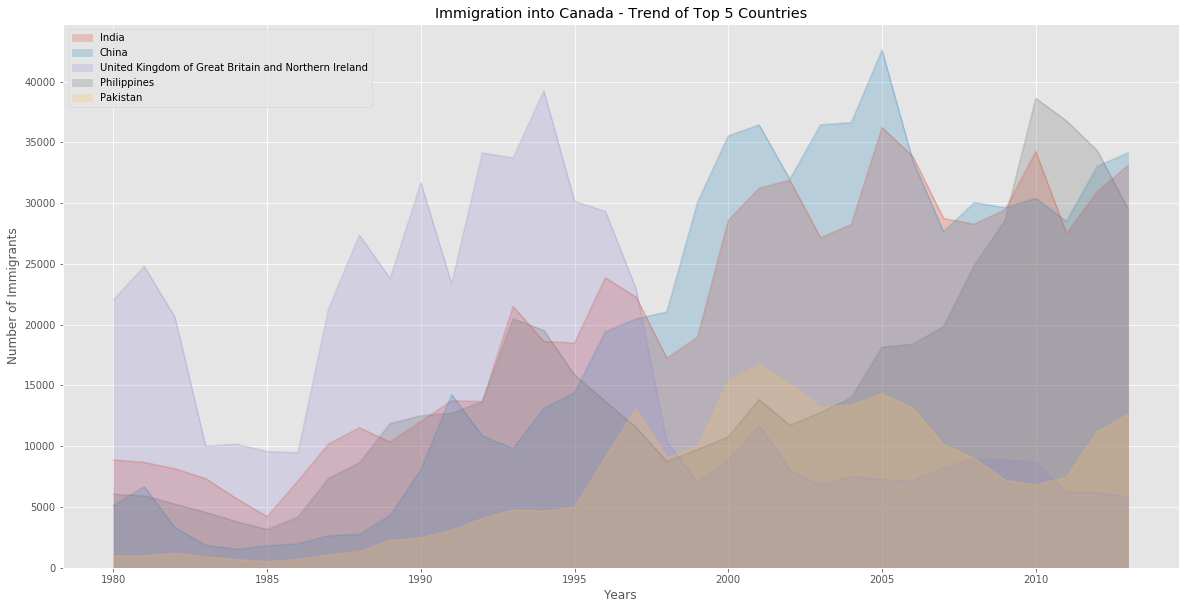

In [25]:
# We are to do that as follows:

df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5 - that's the index of transparency
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration into Canada - Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()





In [26]:
# As you could see this graph is not very comfortable to look at but we could modify that with just some lines.

Text(0.5, 0, 'Years')

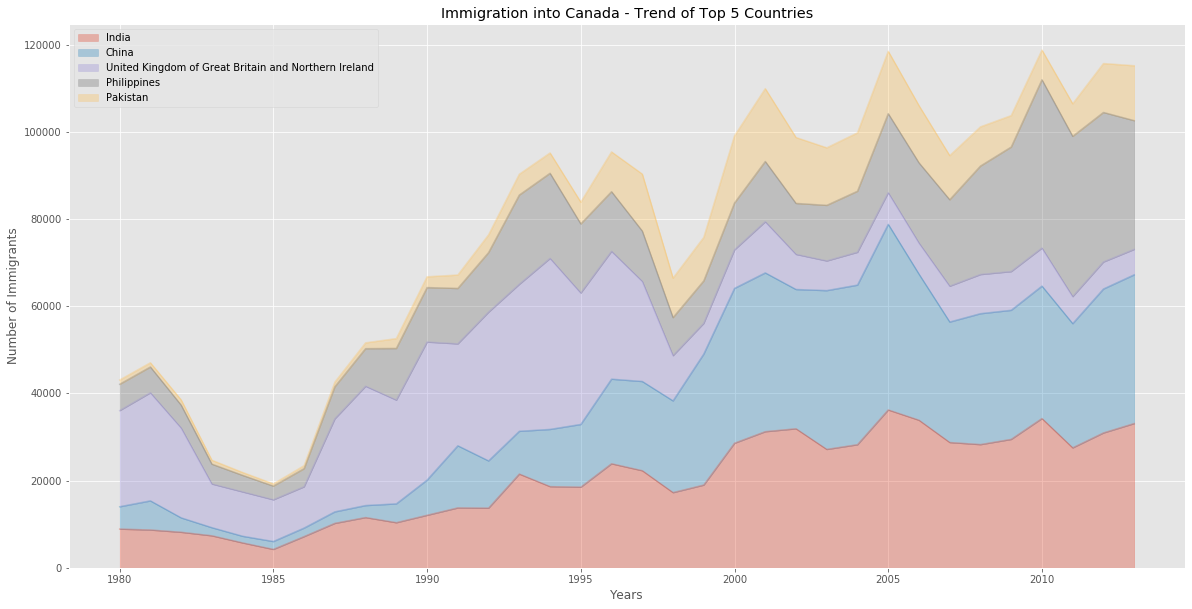

In [27]:
# Preferred option with more flexibility - so called artist layer :).

ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration into Canada - Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [28]:
# The graph became more clear as you could see and you could without huge problems see the scale of immigrants from top 5 countries.

In [29]:
# Well done for now but let's move to a very interesting histogram bars :).
# They'll be our 3rd point.
# Just to remind - a histogram is a way of representing the frequency distribution of numeric dataset.
# To work with histograms we are to operate with another group of countries - beautiful, quiet and more developed than Pakistan and the Philippines
# - from the Iberian peninsula - Andorra, Spain and Portugal.
# 


In [32]:
# let's quickly view the dataset we need

df_can.loc[['Andorra', 'Spain', 'Portugal'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
Spain,211,299,260,133,137,98,121,176,137,168,...,133,126,124,137,169,195,174,179,262,331
Portugal,4473,3486,2432,1433,1398,1451,2617,7684,6888,8570,...,336,338,424,405,665,623,629,528,560,630


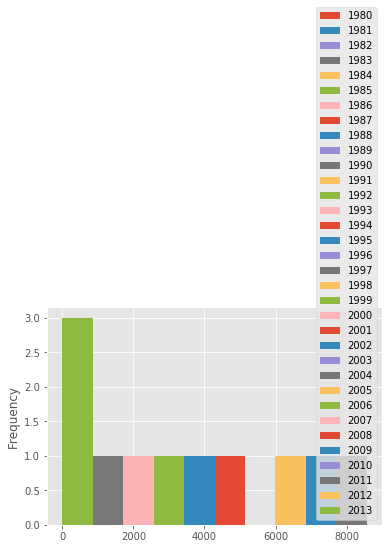

In [33]:
# Not bad. As you could see from these highly developed and very stable countries the current of immigrants into Canada is very-very weak;
# and from Andorra it's almost negligible :).
# Let's generate our histogram and see what we are to receive as a result

df_can.loc[['Andorra', 'Spain', 'Portugal'], years].plot.hist()

In [ ]:
# Oooooops, it does not look right!!!!
#
# But don't worry, we'll often come across situations like this when creating plots. The solution is again in how the underlying dataset is structured.
# Instead of plotting the population frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.
# This can be easily fixed by first transposing the dataset :), and then plotting as shown below.

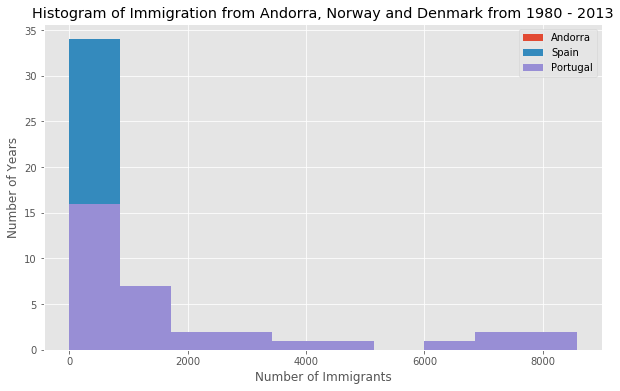

In [34]:
df_t = df_can.loc[['Andorra', 'Spain', 'Portugal'], years].transpose()

df_t.head()

df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Andorra, Norway and Denmark from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()


In [ ]:
# It's far better now BUT it is still not readable.
# Let's make a few modifications to improve the impact and aesthetics of this initial plot:
#
# increase the bin size to 30 by passing in bins parameter; since the data for Andorra is almost negligible;
# set transparency to 60% by passing in alpha parameter;
# label the x-axis by passing in x-label paramater;
# change the colors of the plots by passing in color parameter



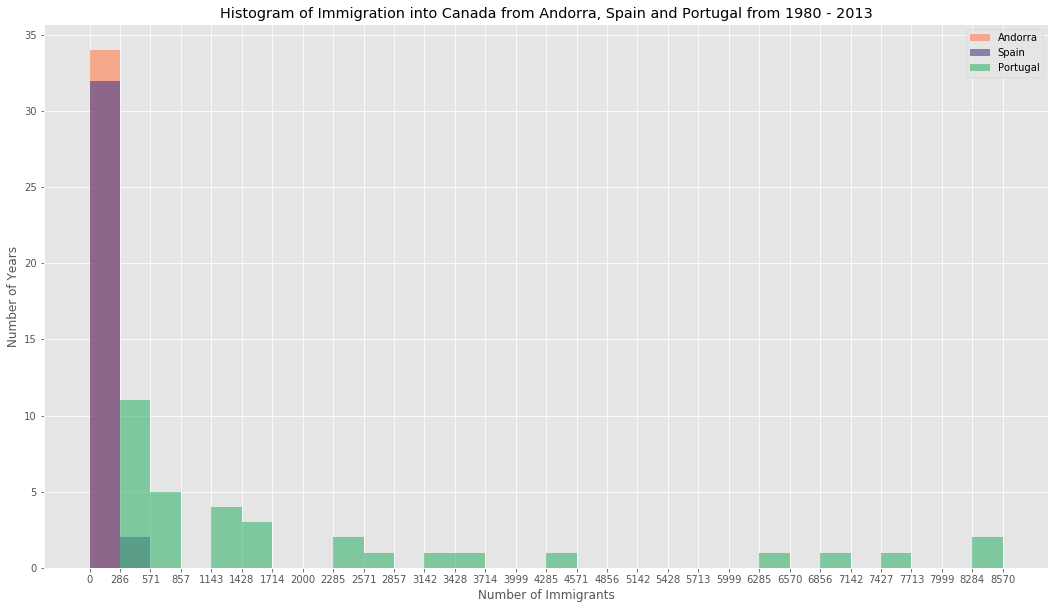

In [47]:
# let's get the x-tick values.

count, bin_edges = np.histogram(df_t, 30)

# to make an un-stacked histogram

df_t.plot(kind ='hist', 
          figsize=(18, 10),
          bins=30,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration into Canada from Andorra, Spain and Portugal from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [38]:
# If we do no want the plots to overlap each other, we can stack them using the stacked paramemter.
# Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot.
# We can pass a tuple (min,max) using the xlim paramater, as shown below.

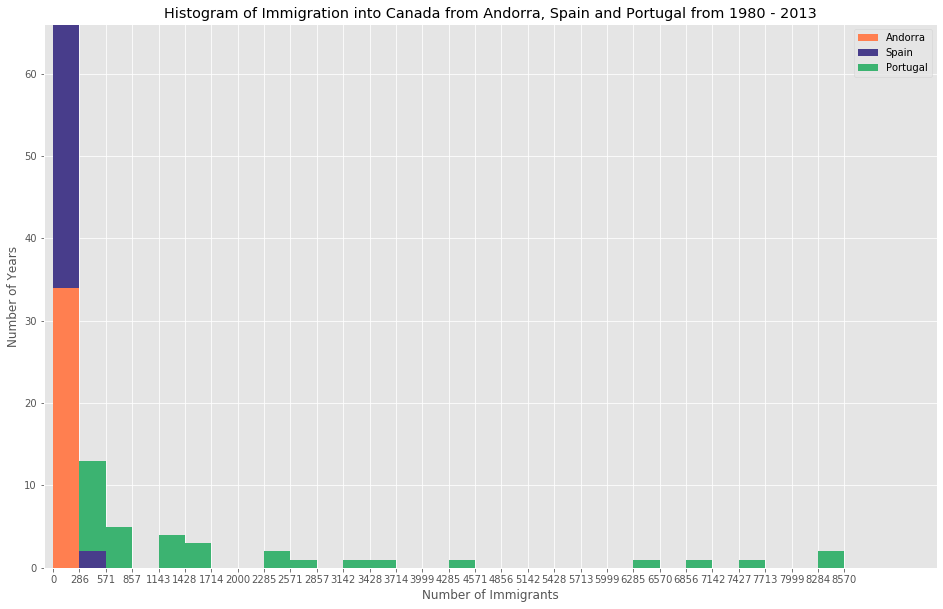

In [48]:
count, bin_edges = np.histogram(df_t, 30)
xmin = bin_edges[0] - 100   #  first bin value is 343.0, adding buffer of 100 for aesthetic purposes 
xmax = bin_edges[-1] + 1000  #  last bin value is 8570.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram

df_t.plot(kind='hist',
          figsize=(16, 10), 
          bins=30,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration into Canada from Andorra, Spain and Portugal from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

In [49]:
# Ok, what does this data factually mean for us and explain?
#
# We could definitely state that precisely Portugal for years sends to Canada more immigrants than its neighbours.
# Secondly, if for Andorra the statistical data is almost negligible, Spain within the whole period of examination never exceeded 600 persons per year; while Portugal for some 2-3 years sent even almost 9 thousand persons.
# This interesting distribution could be explained by the following fact: in Portugal there is a very numerous and strong Jewish diaspora and a lot of immigrants from there are Jewish. 
# 

In [50]:
# Ok, let's work with the 4 variant of our graphs - very stable and the most beautiful for understanding - bar charts :).


In [51]:
# Let's create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the whole period 1980 - 2013.
# Label each country with the total immigrant count.

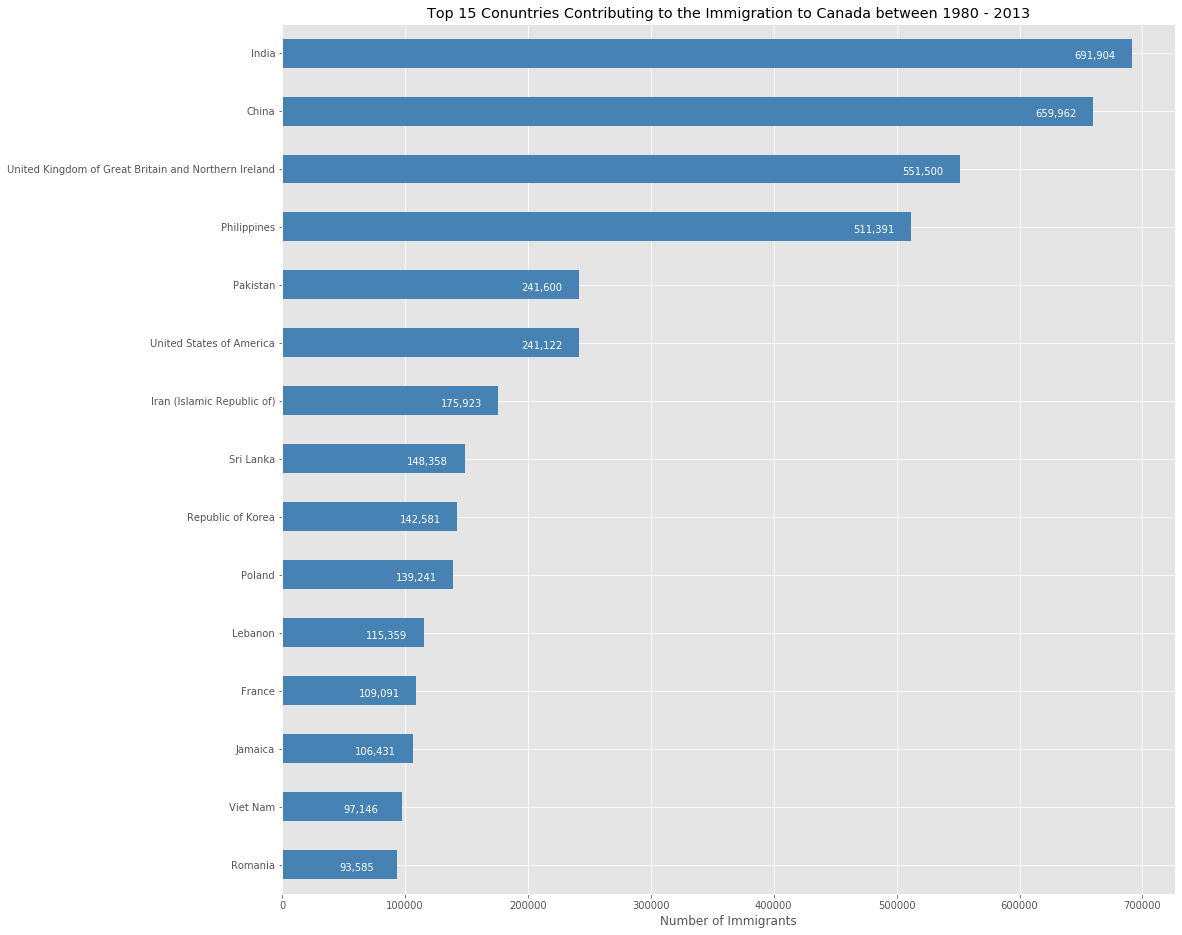

In [53]:
# prepairing the data

df_can.sort_values(by='Total', ascending=True, inplace=True)

# getting top 15 countries

df_top15 = df_can['Total'].tail(15)

df_top15

# plotting the data with evident horizontal bars :)

df_top15.plot(kind='barh', figsize=(16, 16), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotating value labels to each country

for index, value in enumerate(df_top15): 
    
    label = format(int(value), ',') # formatting int with commas
    
    # placing text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()



In [54]:

# So, in a very simple, clear and non-dubious manner we could see from where the majority of immigrants arrived to Canada.




In [55]:

# As the fifth sample of graphs let's take box plots ("sss usssami :)") and Scandinavian countries - Norway, Sweden and Finland.




In [58]:
# prepairing data we need

df_NFS = df_can.loc[['Norway', 'Finland', 'Sweden'], years].transpose()

df_NFS.head()

df_NFS.describe()

,Norway,Finland,Sweden
count,34.000000,34.000000,34.000000
mean,68.441176,81.794118,172.529412
std,20.480872,37.990253,39.830121
min,31.000000,51.000000,123.000000
25%,54.500000,63.000000,142.250000
50%,71.500000,70.000000,167.000000
75%,77.000000,82.750000,186.250000
max,116.000000,208.000000,308.000000


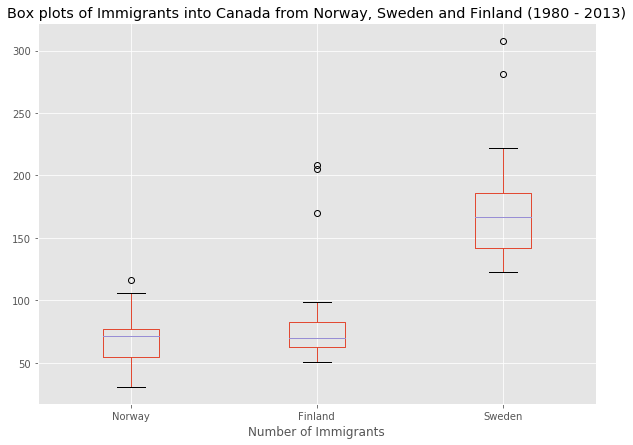

In [57]:
# plotting the data

df_NFS.plot(kind='box', figsize=(10, 7))  # don't forget to use 'kind' and not 'type' for specifying the chart 

plt.title('Box plots of Immigrants into Canada from Norway, Sweden and Finland (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

In [ ]:

# What do we have?
# We can observe that, while two countries (Norway and Finland) have around the same median immigrant population (~ 70),
# their neighbour Sweden has a median twice as higher.
# Besides, Sweden's immigrant population range is more spread out than those of its neighbours.
# The maximum population from Sweden for any year (308) is around 50% higher than the maximum population from Finland (208) and 200% higher than from Norway (116).




In [59]:

# Let's also try a very interesting scatter plot graph as the sixth interesting model.
# We are to visualize the trend of total immigration to Canada (all countries combined) for the years 1980 - 2013.


In [60]:
# prepairing the data - we can use the sum() method to get the total population per year

df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# changing the years to type int (useful for regression later on)

df_tot.index = map(int, df_tot.index)

# resetting the index to put in back in as a column in the df_tot dataframe

df_tot.reset_index(inplace = True)

# renaming columns

df_tot.columns = ['year', 'total']

# viewing the final dataframe

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [81]:
# Now we are to plot it.


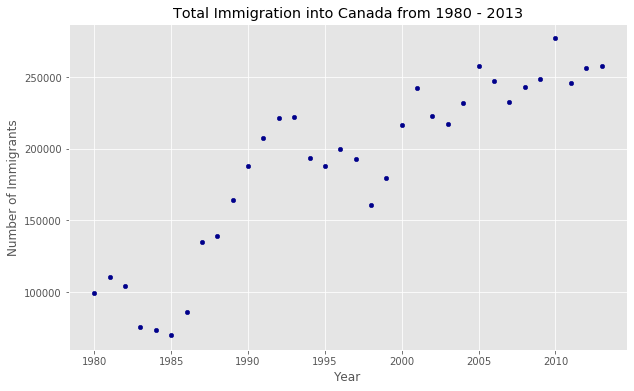

In [61]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration into Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [ ]:

# We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases.
#
# We can mathematically analyze this upward trend using a regression line (line of best fit).
# And since I like statistics :)) we are definitely to do that :).
#
# So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.


In [62]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis

fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

In [63]:

# Since we are plotting a linear regression y= a*x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07] with the the slope in position 0 and intercept in position 1.


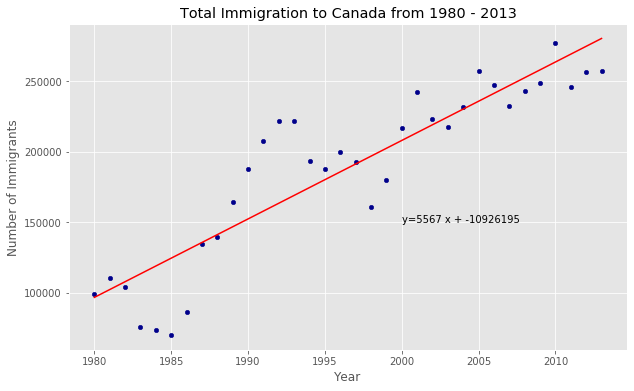

'No. Immigrants = 5567 * Year + -10926195'

In [64]:

# plotting the regression line on the scatter plot

df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [65]:
# using the equation of our line of best fit, we can estimate the number of immigrants in 2015:
#
# No. Immigrants = 5567 * Year - 10926195
# No. Immigrants = 5567 * 2015 - 10926195
# No. Immigrants = 291,310
#
# When compared to the actuals from Citizenship and Immigration Canada's (CIC) 2016 Annual Report, we see that Canada accepted 271,845 immigrants in 2015.
# It means that our estimated value of 291,310 is within 7% of the actual number, which is pretty good :) considering our original data came from United Nations (and might differ slightly from CIC data).


In [ ]:

# And finally let's work with Seaborn that is a Python visualization library based on matplotlib.
# It provides a high-level interface for drawing attractive statistical graphics.
# We are going to use it by exploring how to create interesting regression plots and fit them.


In [73]:
# As usual first we are to install seaborn.

In [66]:

import seaborn as sns

print('Activity confirmed. Seaborn is installed and imported!')

Activity confirmed. Seaborn is installed and imported!


In [74]:

# Initially let'stry a very simple example and see how easy to draw the same regression plot is in Seaborn.
# We are to explore the same total immigration inflow into Canada in 1980-2013.


In [68]:
# We can use the sum() method to get the total population per year

df_total = pd.DataFrame(df_can[years].sum(axis=0))

# changing the years to type float (useful for regression later on)

df_total.index = map(float, df_total.index)

# resetting the index to put it back in as a column in the df_total dataframe

df_total.reset_index(inplace=True)

# renaming columns

df_total.columns = ['year', 'total']

# view the final dataframe

df_total.head(10)

# df_total.tail(10)

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417
5,1985.0,69978
6,1986.0,86048
7,1987.0,134771
8,1988.0,139306
9,1989.0,164432


In [72]:
# With seaborn, generating a regression plot is as simple as calling the regplot function :).

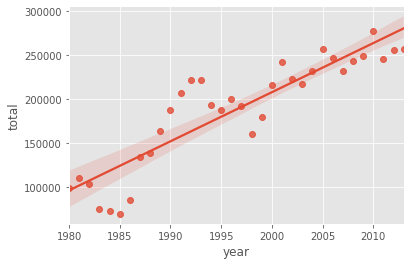

In [69]:

ax = sns.regplot(x='year', y='total', data=df_total)


In [71]:
# Voila! Just one line if to compare with what we've done some earlier :). 

In [70]:
# Let's make some modifications to make our chart more attractive and readable and to see how simple these procedures are. 

Text(0.5, 1.0, 'Total Immigration into Canada in 1980 - 2013')

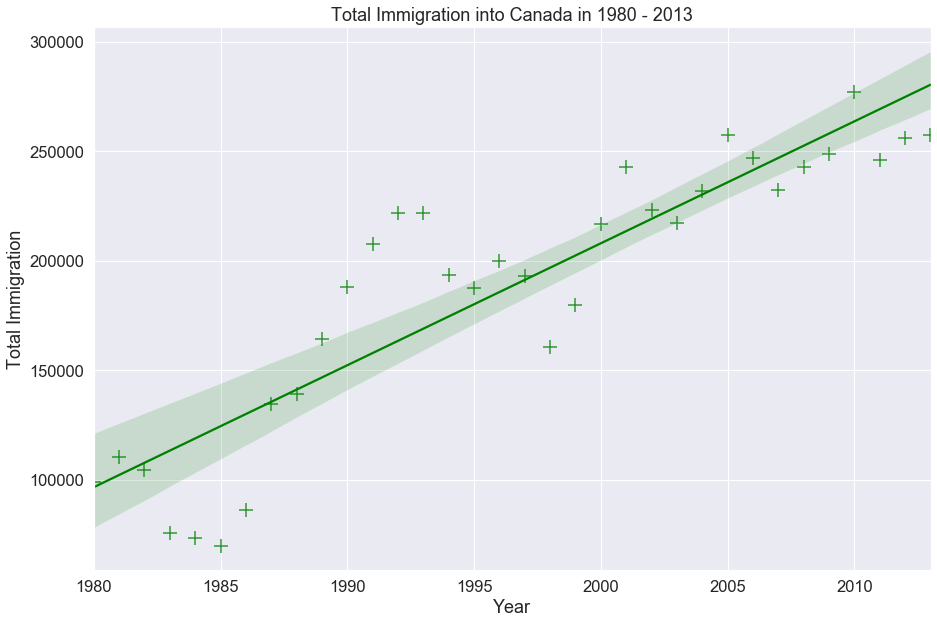

In [85]:
plt.figure(figsize=(15, 10))   # herewith we change the size scale of our figure to enlarge it.

sns.set(font_scale=1.5)   # by this we increase a little our font

# some below we are to change the color of lines, symbol of our marker, size of our scatters
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')     # adding labels to our axis

ax.set_title('Total Immigration into Canada in 1980 - 2013')    # and finally adding the name

In [76]:
# Great! :) So clear and effective picture of the overall immigration in Canada with a clear trend.

In [77]:
# Just a little perk - let's change our purple to a white background with gridlines - to be statistically solid :).

Text(0.5, 1.0, 'Total Immigration into Canada in 1980 - 2013')

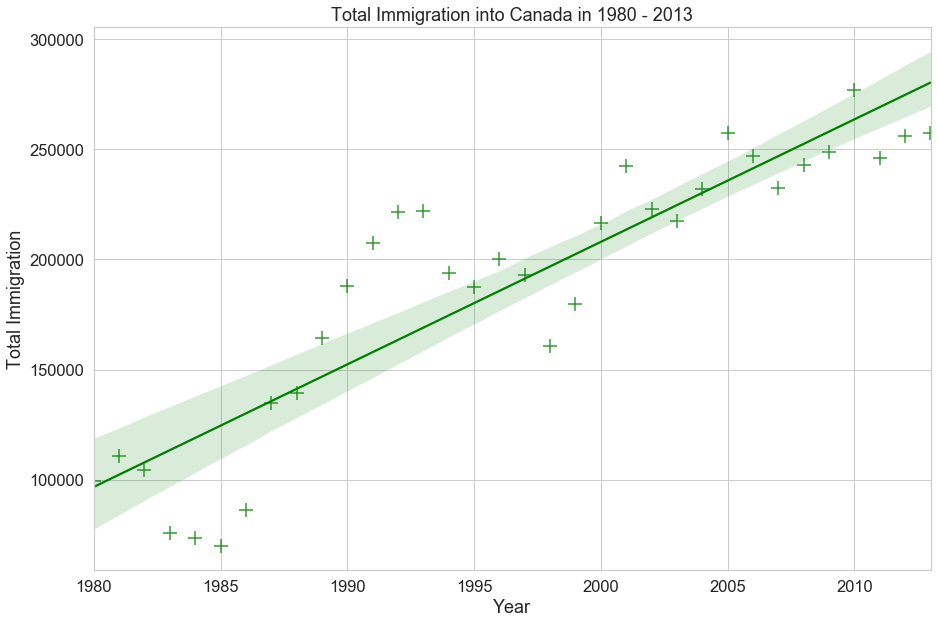

In [86]:

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration into Canada in 1980 - 2013')


In [79]:
# Well done, ladies and gentlemen! Now you could see the dynamics and the very trend clearly and without any ambiguity.

In [80]:

# And to finish our homework taskS with something interesting - we are to create in a seaborn environment a regression plot of
# immigration flows from Russia, Belarus and Ukraine to see what's really going on and what is to be expected  from our Slavic compatriots :).


Text(0.5, 1.0, 'Total Immigrationn from Russia, Ukraine and Belarus into Canada in 1980 - 2013')

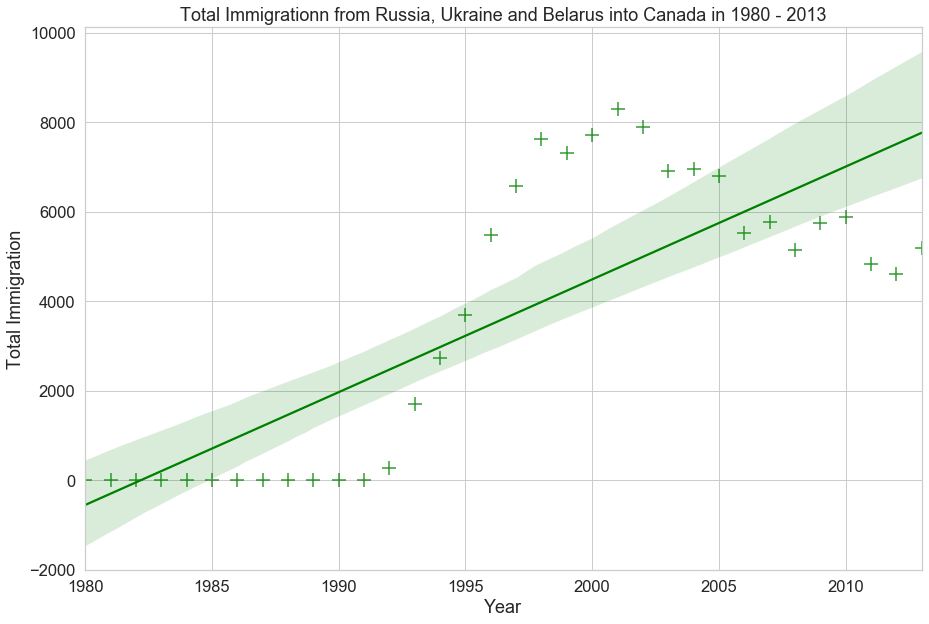

In [83]:

# as usual we are to prepare our data initially
    
df_slavic_countries = df_can.loc[['Russian Federation', 'Ukraine', 'Belarus'], years].transpose()



# creating df_slavic_total by summing across three countries for each year
    
df_slavic_total = pd.DataFrame(df_slavic_countries.sum(axis=1))



# resetting index in place

df_slavic_total.reset_index(inplace=True)

# renaming columns

df_slavic_total.columns = ['year', 'total']

# changing column year from string to int to create scatter plot

df_slavic_total['year'] = df_slavic_total['year'].astype(int)

# defining figure size

plt.figure(figsize=(15, 10))

# defining background style and font size

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generating the very plot and adding title and axes labels

ax = sns.regplot(x='year', y='total', data=df_slavic_total, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')

ax.set_title('Total Immigrationn from Russia, Ukraine and Belarus into Canada in 1980 - 2013')








In [84]:

# From our chart we could clearly see that the overall immigration flow from our Slavic countries is high enough 
# and has an evident trend for increasing.
# However, these flows are NOT stable and oscillate substantially around the trend line.
# Besides, we could see that after tightening immigration laws on the eve of the 21st centure the immigrants from our countries
# decreased in their numbers from 6000-8000 people annually in 1995-2005 to 4000-6000 people annually presently, i.e. loosing almost 25% of its share.



In [87]:
# Thank you for your attention and participation in our practice!
# It was one of the best lesson in the whole course of our Python studies! :))